In [1]:
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=0.8, 
        context="paper", 
        style="ticks", 
        rc={"axes.linewidth": 0.8})
sns.set_palette("viridis")

%matplotlib inline

import sys
sys.path.append("../..")

from atm.obs import WISE
from atm.models import NEATM
from atm.functions import calcQ
from atm.functions import calcFluxLambdaAtObsWithSunlight
from atm.analysis import calcColors
from atm.analysis import mergeResultsWithNEOWISE
from atm.plotting import plotHist

In [2]:
DPI = 600
SAVE_DIR = "../plots/"
FORMAT = "png"

SAVE_FIGS = True

In [3]:
RUN_DIR = "../../data/runs"
RUN_NAME = "run1"

In [4]:
results_database = os.path.join(RUN_DIR, "atm_results_{}.db".format(RUN_NAME))
merged_results, pp_dfs = mergeResultsWithNEOWISE("../../data/sample.db", 
                                                 results_database, 
                                                 minObs=3, 
                                                 fitCodes=["DVBI"])

There are 165865 fits for 140493 unique objects in the 2016 NEOWISE PDS table.
Selecting only fits with at least 3 observations in each band.
Selecting only fits with fit code(s): DVBI.
There are 3098 fits for 2867 unique objects.
3045 fits have been matched with an object in observations.
Sorting by number of observations and keeping the fits using the most observations...
2817 fits have been found for 2817 unique objects in observations.

Merging NEOWISE results with post-processed tables...
Done.



Filtered results: 2807


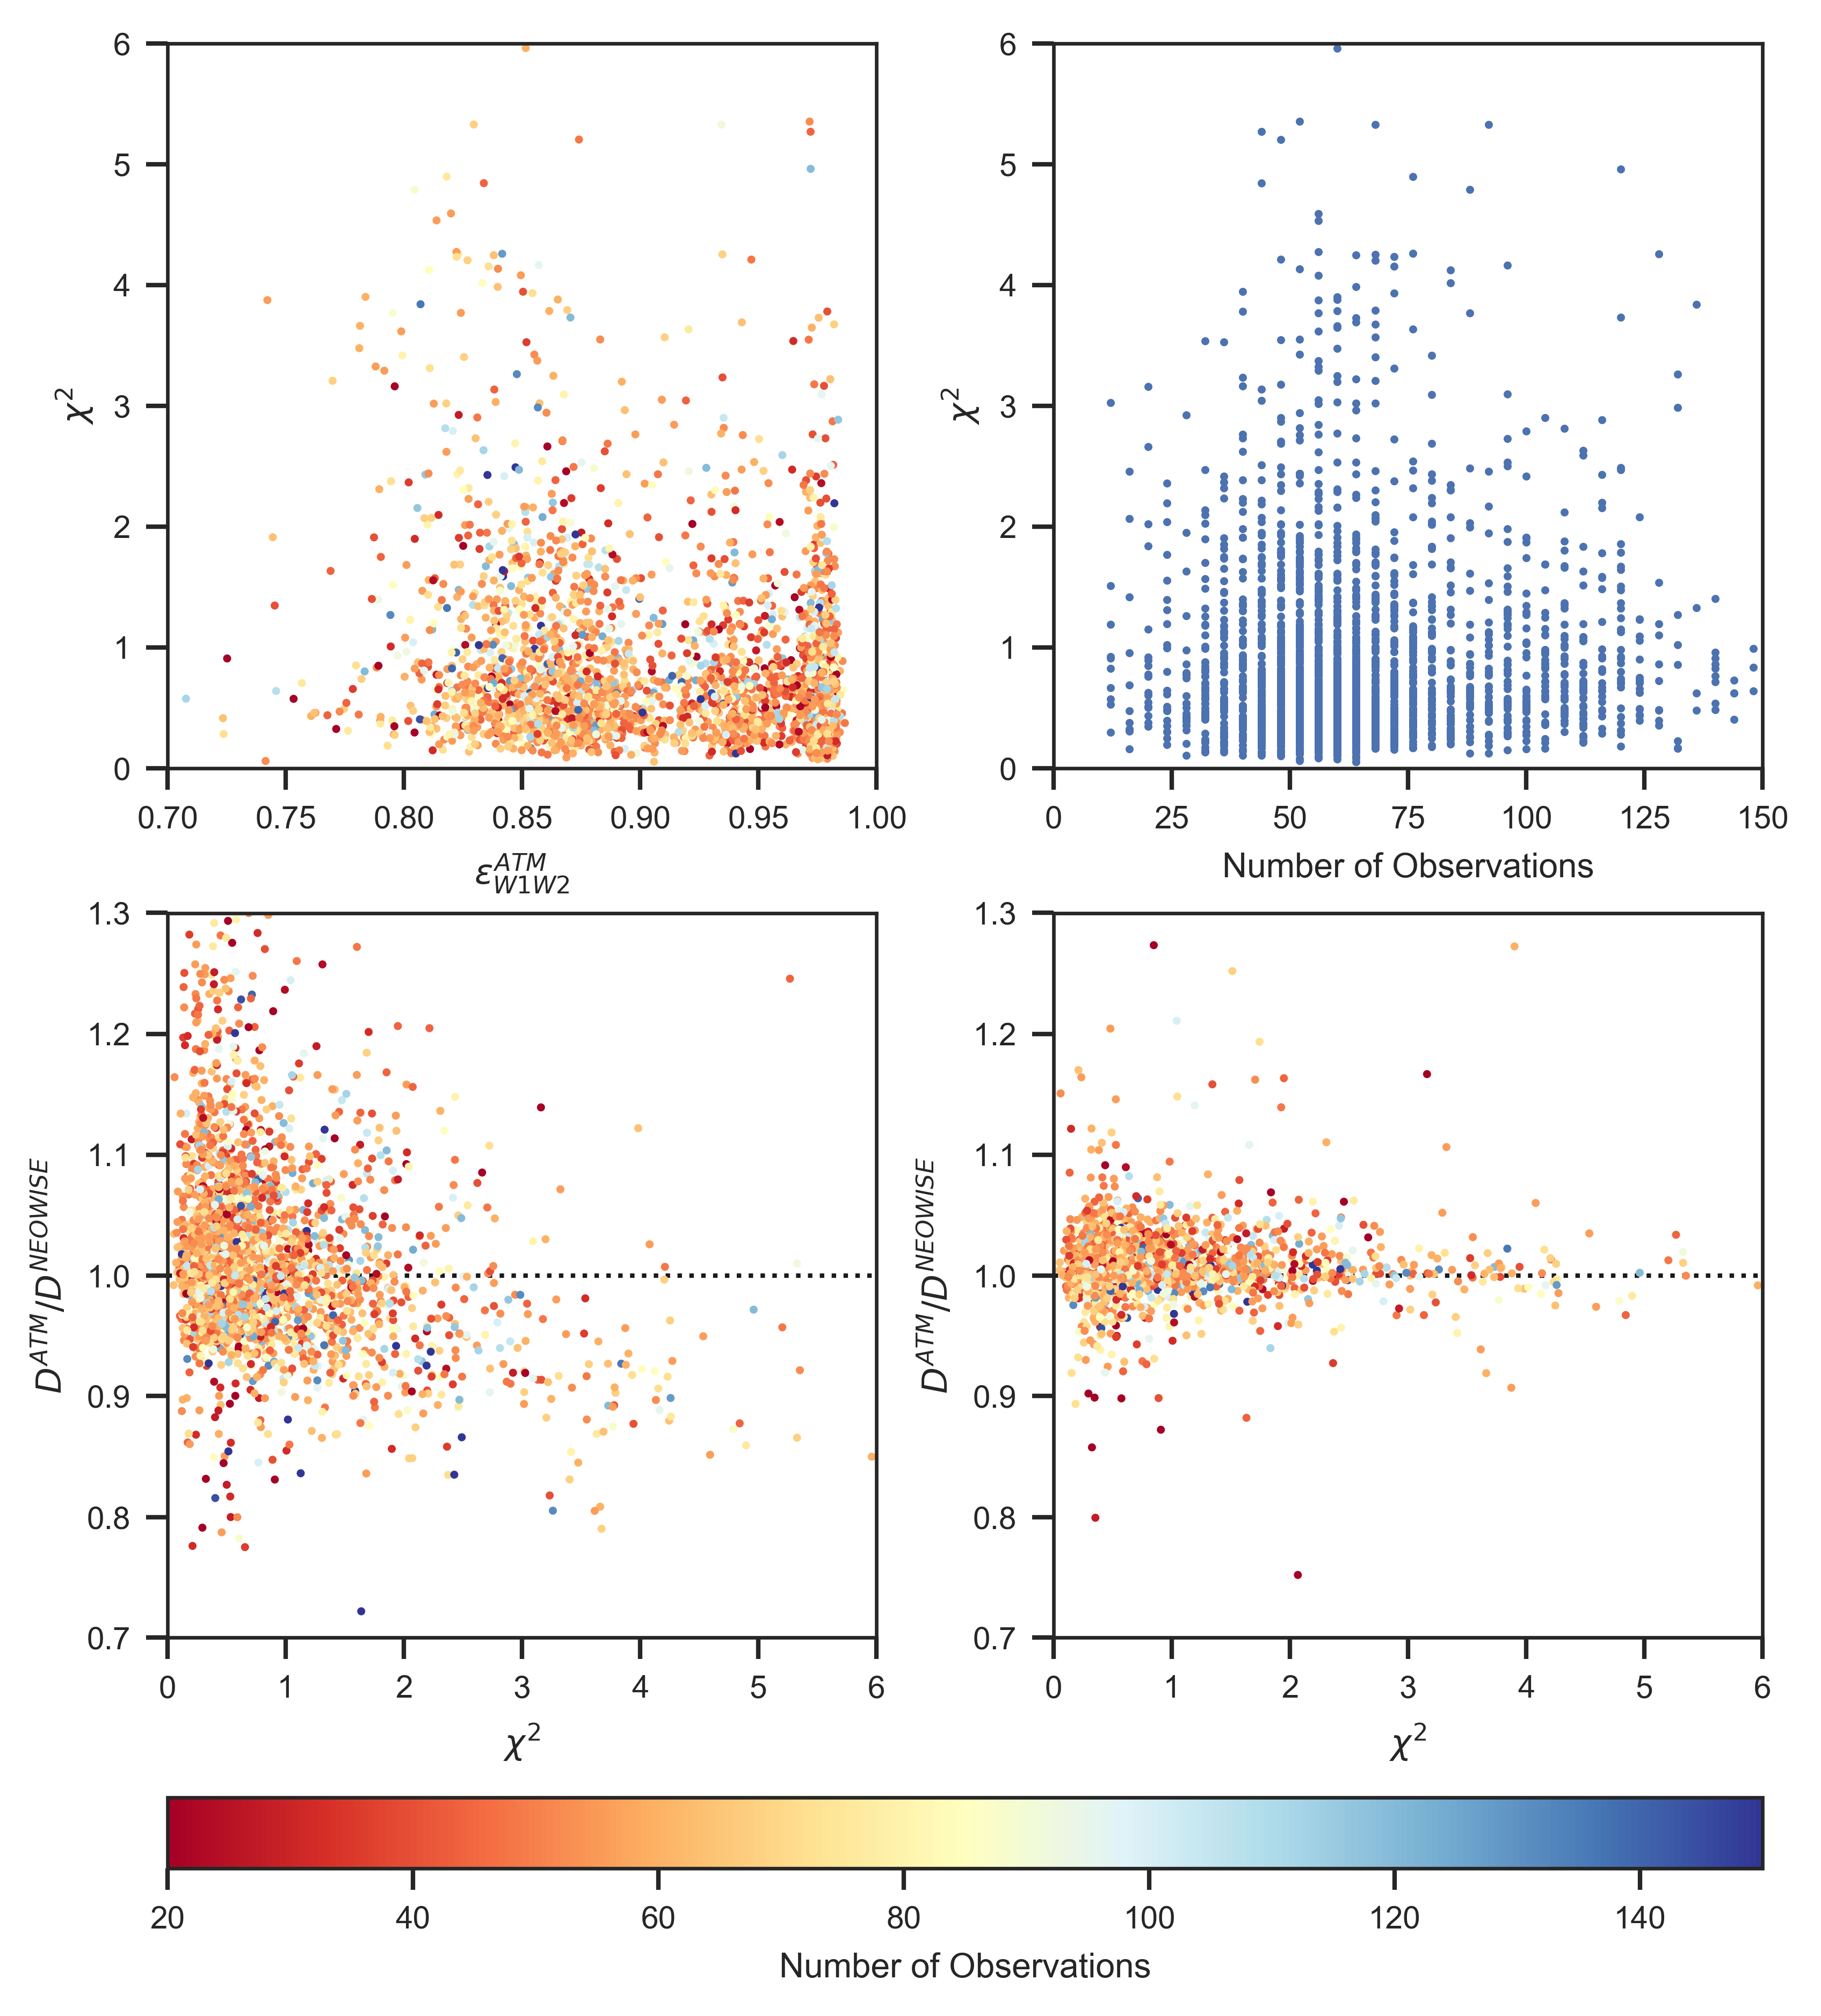

In [5]:
merged_results["eps_W1W2_NEOWISE"] = 1 - merged_results["IR_ALBEDO"] * calcQ(merged_results["SLOPE_PARAM"])

filtered_results = merged_results
print("Filtered results: {}".format(len(filtered_results)))

scatterKwargs = {
    "cmap" : "RdYlBu",
    "vmin" : 20,
    "vmax" : 150,
    "s": 1,
    "c": filtered_results["num_obs"].values
}

fig, ax = plt.subplots(2, 2, dpi=DPI, figsize=(5.5, 5.5))
fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.05,  
        # the right side of the subplots of the figure
        right=0.95,
        # the bottom of the subplots of the figure
        bottom=0.05,
        # the top of the subplots of the figure
        top=0.95,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.25,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.2)   
cm = ax[0,0].scatter(filtered_results["eps_W1W2_median"].values, 
                     filtered_results["reduced_chi2"].values,
                     **scatterKwargs)
ax[0,0].set_xlabel("$\epsilon_{W1W2}^{ATM}$")
ax[0,0].set_ylabel("$\chi^2$")
ax[0,0].set_ylim(0, 6)
ax[0,0].set_xlim(0.70, 1.0)

cm = ax[0,1].scatter(filtered_results["num_obs"].values, 
                     filtered_results["reduced_chi2"].values,
                     s=1,
                     c="b")
ax[0,1].set_xlabel("Number of Observations")
ax[0,1].set_ylabel("$\chi^2$")
ax[0,1].set_xlim(0, 150)
ax[0,1].set_ylim(0, 6)

cm = ax[1,0].scatter(filtered_results["reduced_chi2"].values, 
                     10**filtered_results["logD_median"].values / (filtered_results["DIAMETER"].values * 1000.), 
                     **scatterKwargs)
ax[1,0].hlines([1], 0, 6, linestyle=":", lw=1, color="k", zorder=0)
ax[1,0].set_xlabel("$\chi^2$")
ax[1,0].set_ylabel("$D^{ATM}/D^{NEOWISE}$")
ax[1,0].set_xlim(0, 6)
ax[1,0].set_ylim(0.7, 1.3)

cm = ax[1,1].scatter(filtered_results["reduced_chi2"].values, 
                     filtered_results["eps_W1W2_median"].values / (filtered_results["eps_W1W2_NEOWISE"].values), 
                     **scatterKwargs)
ax[1,1].hlines([1], 0, 6, linestyle=":", lw=1, color="k", zorder=0)
ax[1,1].set_xlabel("$\chi^2$")
ax[1,1].set_ylabel("$D^{ATM}/D^{NEOWISE}$")
ax[1,1].set_xlim(0, 6)
ax[1,1].set_ylim(0.7, 1.3)

cbar_ax = fig.add_axes([0.05, -0.08, 0.90, 0.04])
fig.colorbar(cm, 
             cax=cbar_ax, 
             label=r"Number of Observations", 
             orientation="horizontal")
if SAVE_FIGS is True:
    fig.savefig(os.path.join(SAVE_DIR, "chi2_num_obs.{}".format(FORMAT)),
            bbox_inches='tight')

Filtered results: 2656
5 values are outside the defined minimum and maximum.
14 values are outside the defined minimum and maximum.
15 values are outside the defined minimum and maximum.


/Users/moeyensj/software/anaconda3/envs/atm_py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/moeyensj/software/anaconda3/envs/atm_py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/moeyensj/software/anaconda3/envs/atm_py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/moeyensj/software/anaconda3/envs/atm_py36/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did n

mu : 0.977
sigma : 0.004
weight : 0.299

mu : 0.862
sigma : 0.030
weight : 0.506

mu : 0.945
sigma : 0.015
weight : 0.195

20 values are outside the defined minimum and maximum.
mu : 0.358
sigma : 0.077
weight : 0.501

mu : 0.060
sigma : 0.010
weight : 0.296

mu : 0.142
sigma : 0.039
weight : 0.203



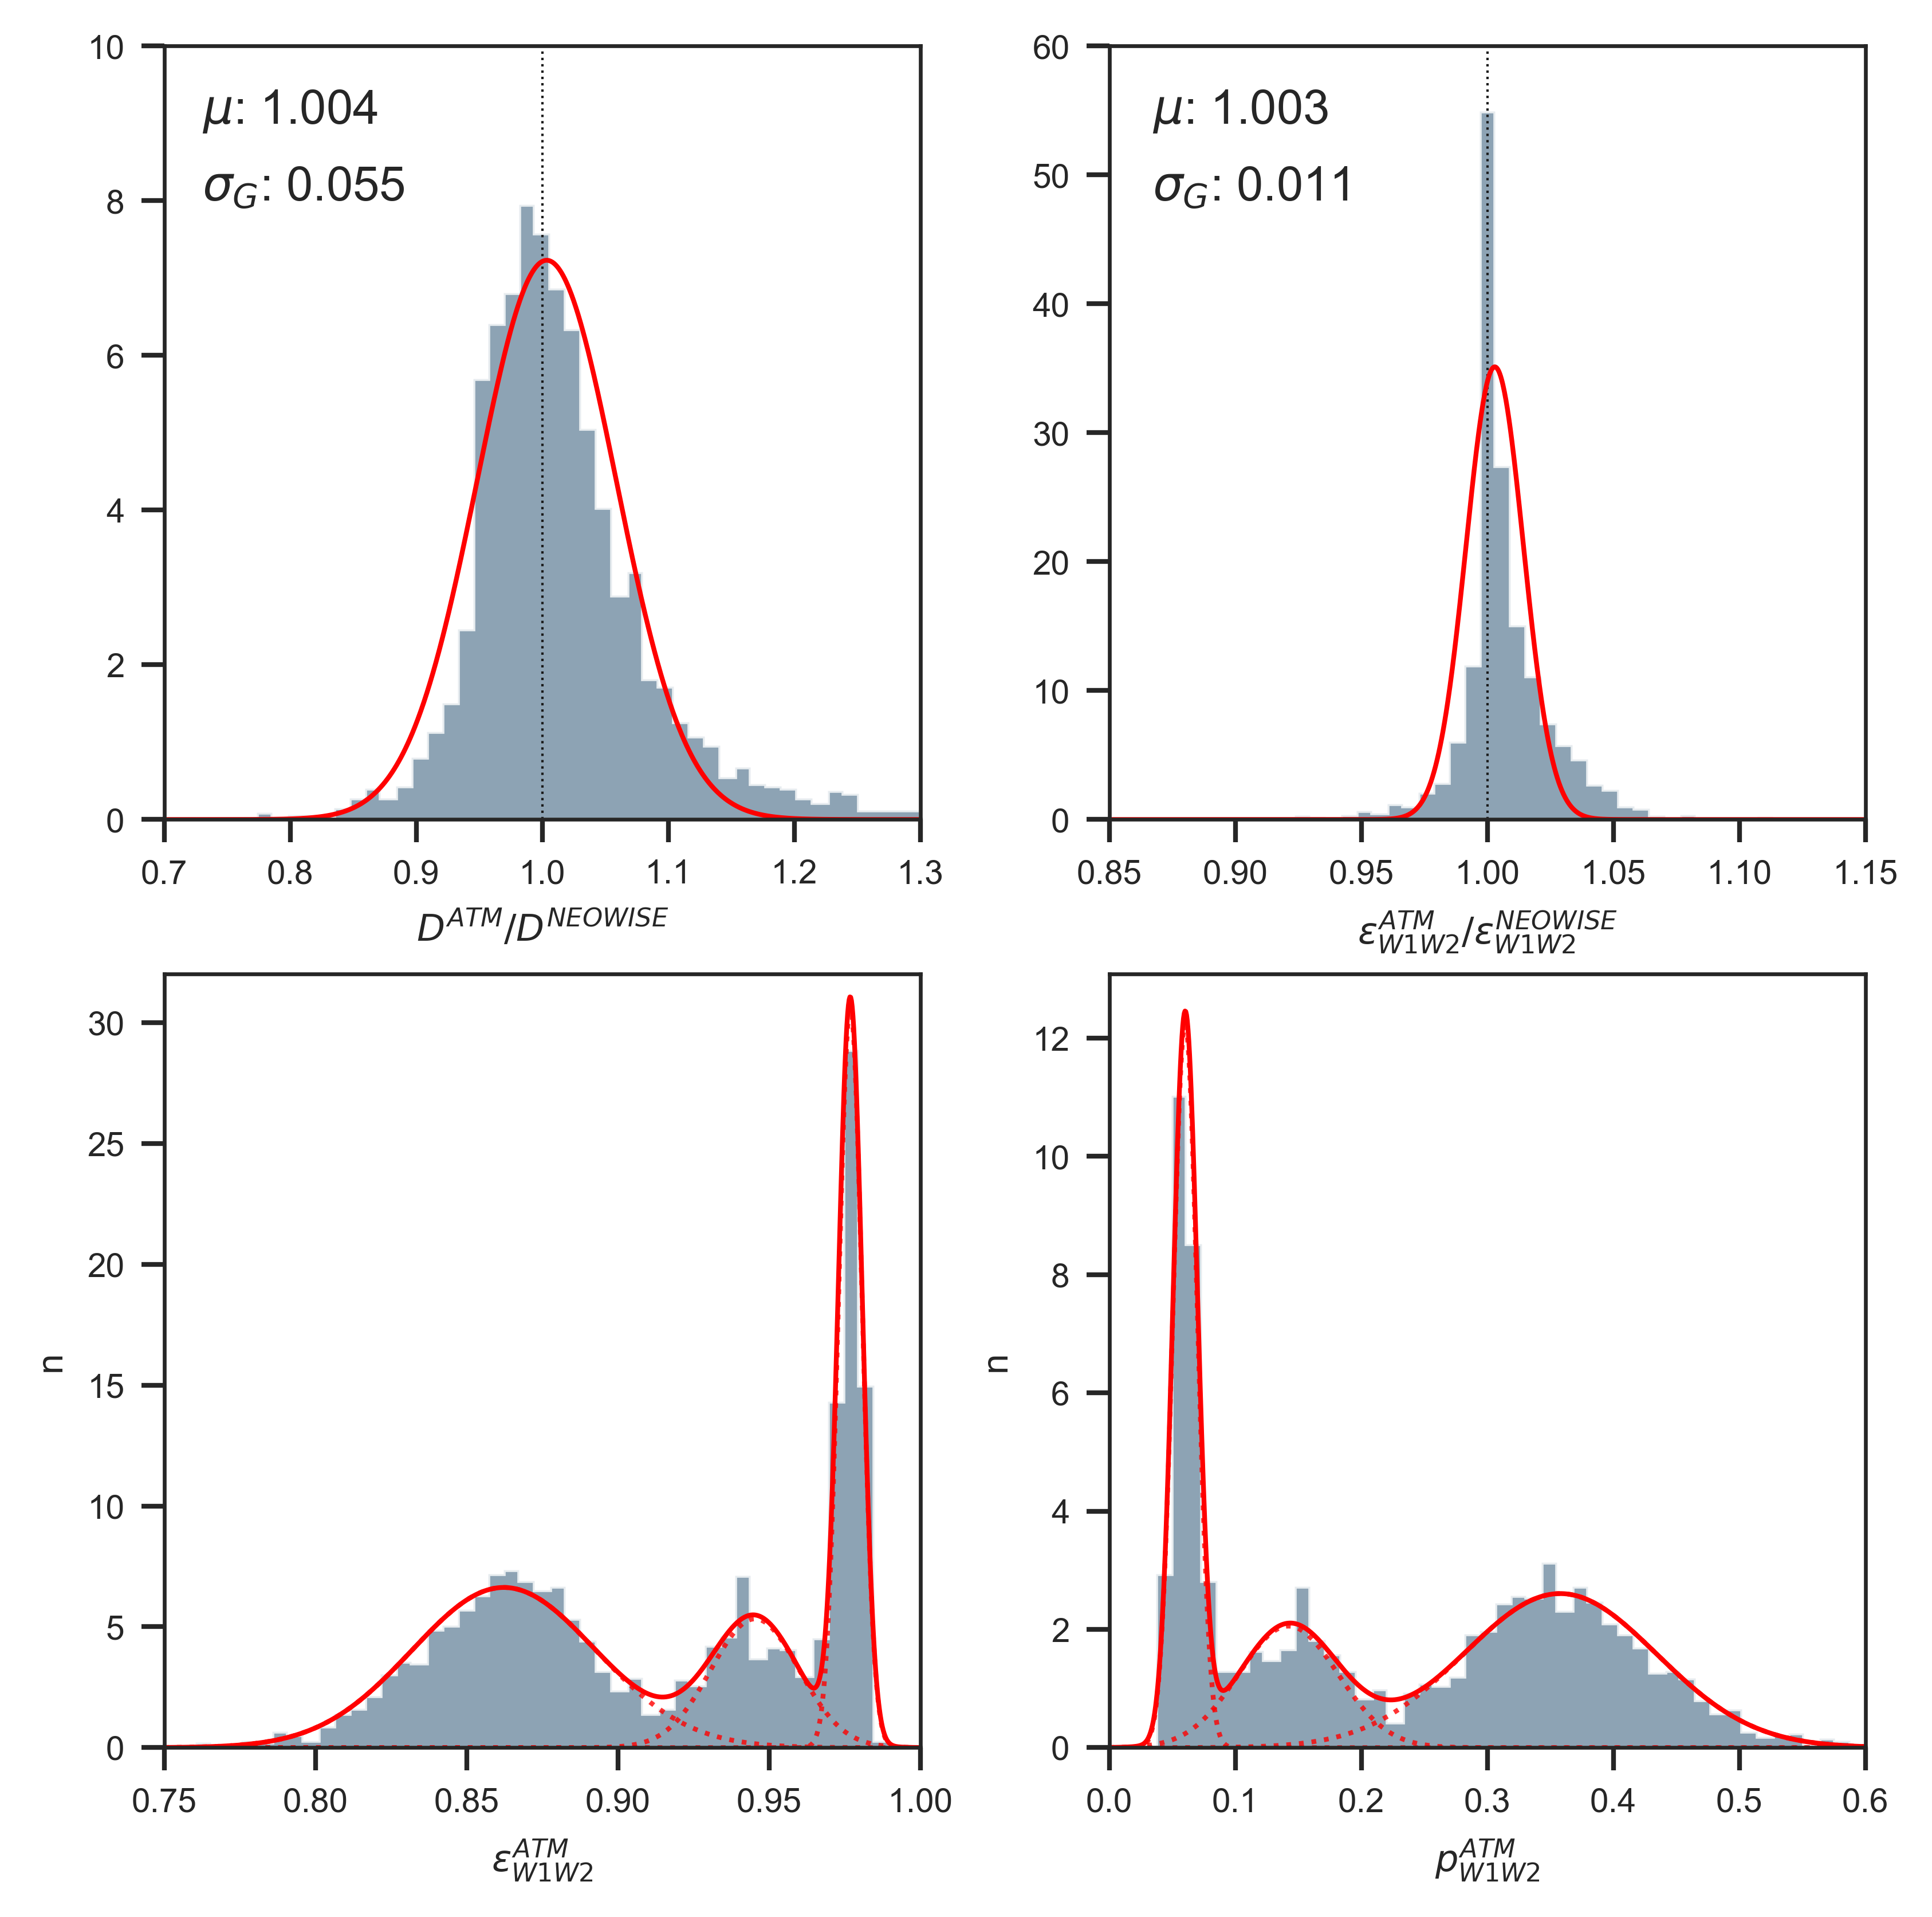

In [6]:
merged_results["eps_W1W2_NEOWISE"] = 1 - merged_results["IR_ALBEDO"] * calcQ(merged_results["SLOPE_PARAM"])
merged_results["p_W1W2_median"] = (1 - merged_results["eps_W1W2_median"]) / calcQ(merged_results["G_median"])

filtered_results = merged_results[(merged_results["num_obs"] >= 28)
                                  & (merged_results["reduced_chi2"] < 3)]
print("Filtered results: {}".format(len(filtered_results)))

histKwargs = {
    "histtype" : "stepfilled",
    "color" : "#718CA1",
    "alpha" : 0.8, 
    "normed" : True,
}
plotKwargs = {
    "ls" : "-",
    "lw" : 1,
    "c" : "red"
}

plotKwargsComponents = {
    "ls" : ":",
    "lw" : 1,
    "c" : "red",
    "alpha" : 0.8
}

verticalLines = {
    "lw" : 0.5,
    "linestyle" : ":",
}

fig, ax = plt.subplots(2, 2, dpi=DPI, figsize=(5.5, 5.5))
fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.05,  
        # the right side of the subplots of the figure
        right=0.95,
        # the bottom of the subplots of the figure
        bottom=0.05,
        # the top of the subplots of the figure
        top=0.95,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.25,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.2)   
ax[0,0], stats = plotHist(ax[0,0], 
                         10**filtered_results["logD_median"].values / (filtered_results["DIAMETER"].values * 1000.), 
                         [0.7, 1.3], 
                         numGauss=1, 
                         bins=50,
                         histKwargs=histKwargs,
                         plotKwargs=plotKwargs)
ax[0,0].vlines([1.0], 0, 10, **verticalLines)
ax[0,0].set_xlabel(r"$D^{ATM} / D^{NEOWISE}$")
ax[0,0].set_xlim(0.7, 1.3)
ax[0,0].set_ylim(0, 10)
ax[0,0].text(0.73, 9.0, r"$\mu$: {:.3f}".format(stats[0]))
ax[0,0].text(0.73, 8.0, r"$\sigma_G$: {:.3f}".format(stats[1]))


ax[0,1], stats = plotHist(ax[0,1], 
                         filtered_results["eps_W1W2_median"].values / filtered_results["eps_W1W2_NEOWISE"].values, 
                         [0.85, 1.15], 
                         numGauss=1, 
                         bins=50,
                         histKwargs=histKwargs,
                         plotKwargs=plotKwargs)
ax[0,1].vlines([1.0], 0, 60, **verticalLines)
ax[0,1].set_xlabel(r"$\epsilon^{ATM}_{W1W2} / \epsilon^{NEOWISE}_{W1W2}$")
ax[0,1].set_xlim(0.85, 1.15)
ax[0,1].set_ylim(0, 60)
ax[0,1].text(0.867, 54, r"$\mu$: {:.3f}".format(stats[0]))
ax[0,1].text(0.867, 48, r"$\sigma_G$: {:.3f}".format(stats[1]))

ax[1,0], stats = plotHist(ax[1,0], 
                          filtered_results["eps_W1W2_median"].values, 
                          [0.75, 1], 
                          numGauss=3, 
                          bins=50,
                          histKwargs=histKwargs,
                          plotKwargs=plotKwargs,
                          plotKwargsComponents=plotKwargsComponents)
ax[1,0].set_xlabel("$\epsilon^{ATM}_{W1W2}$")
ax[1,0].set_ylabel("n")
ax[1,0].set_ylim(0, 32)
ax[1,0].set_xlim(0.75, 1.0)
for gauss in stats:
    print("mu : {:.3f}".format(gauss[0]))
    print("sigma : {:.3f}".format(gauss[1]))
    print("weight : {:.3f}".format(gauss[2]))
    print("")
    
ax[1,1], stats = plotHist(ax[1,1], 
                          filtered_results["p_W1W2_median"].values, 
                          [0, 0.6], 
                          numGauss=3,
                          bins=50,
                          histKwargs=histKwargs,
                          plotKwargs=plotKwargs,
                          plotKwargsComponents=plotKwargsComponents)
ax[1,1].set_xlabel("$p^{ATM}_{W1W2}$")
ax[1,1].set_ylabel("n")#
ax[1,1].set_xlim(0.0, 0.6)
for gauss in stats:
    print("mu : {:.3f}".format(gauss[0]))
    print("sigma : {:.3f}".format(gauss[1]))
    print("weight : {:.3f}".format(gauss[2]))
    print("")

if SAVE_FIGS is True:
    fig.savefig(os.path.join(SAVE_DIR, "diameter_emissivity_albedo.{}".format(FORMAT)),
                bbox_inches='tight')

In [7]:
model = NEATM(verbose=False)
obs = WISE()

D = 10000.
G = 0.15
alpha_rad = pp_dfs[0]["alpha_rad"].median()
r = np.linspace(1.5, 5.5, 46)

track_dict = {
    "track1a" : {
        "T1" : 406,
        "eps_W1" : 0.977,  
        "eps_W2" : 0.977, 
        "eps_W3" : 0.80,
        "eps_W4" : 0.98,
    },
    
    "track1b" : {
        "T1" : 406,
        "eps_W1" : 0.977,  
        "eps_W2" : 0.977, 
        "eps_W3" : 0.90,
        "eps_W4" : 0.90,
    },
    
    "track2a" : {
        "T1" : 399,
        "eps_W1" : 0.946,  
        "eps_W2" : 0.946, 
        "eps_W3" : 0.80,
        "eps_W4" : 0.98,
    },
    
    "track2b" : {
        "T1" : 399,
        "eps_W1" : 0.946,  
        "eps_W2" : 0.946, 
        "eps_W3" : 0.90,
        "eps_W4" : 0.90,
    },
    
    "track3a" : {
        "T1" : 391,
        "eps_W1" : 0.863,  
        "eps_W2" : 0.863, 
        "eps_W3" : 0.80,
        "eps_W4" : 0.98,
    },
    
    "track3b" : {
        "T1" : 391,
        "eps_W1" : 0.863,  
        "eps_W2" : 0.863, 
        "eps_W3" : 0.90,
        "eps_W4" : 0.90,
    },  
}

lambd = obs.filterEffectiveLambdas
num_lambds = len(lambd)

track_df = []
for track in track_dict.keys():
    for r_i in r:
        # Make array of assumed emissivities
        eps = np.array([
            track_dict[track]["eps_W1"], 
            track_dict[track]["eps_W2"], 
            track_dict[track]["eps_W3"], 
            track_dict[track]["eps_W4"]
        ])
        # Calculate albedo
        albedo = (1 - eps) / calcQ(G)
        
        # Calculate flux at 4 WISE bands
        flux = calcFluxLambdaAtObsWithSunlight(
            model, 
            r_i * np.ones(num_lambds),
            (r_i - 1) * np.ones(num_lambds),
            lambd,
            track_dict[track]["T1"] / np.sqrt(r_i) * np.ones(num_lambds),
            D * np.ones(num_lambds),
            alpha_rad * np.ones(num_lambds),
            eps,
            albedo,
            G * np.ones(num_lambds))

        # Convert to magnitudes and add to a DataFrame
        mag = obs.convertFluxLambdaToMag(flux.T)
        track_df.append(pd.DataFrame({
            "track" : [track],
            "r_au" : [r_i],
            "mag_W1" : [mag[0]],
            "mag_W2" : [mag[1]],
            "mag_W3" : [mag[2]],
            "mag_W4" : [mag[3]]}))

tracks = pd.concat(track_df)
tracks.reset_index(inplace=True, drop=True)
tracks["obs_id"] = np.arange(1, len(tracks) + 1)

# Calculate colors
colors = calcColors(obs, tracks)
tracks = tracks.merge(colors, on="obs_id")

Calculating colors using these columns:
Magnitudes : mag_W1, mag_W2, mag_W3, mag_W4
Creating colors: W1-W2, W2-W3, W3-W4
Done.



In [8]:
def _plotTracks(ax, xCol, yCol):
    ax.plot(tracks[tracks["track"] == "track1a"][xCol].values,
            tracks[tracks["track"] == "track1a"][yCol].values,
            c="k")
    ax.plot(tracks[tracks["track"] == "track1b"][xCol].values,
            tracks[tracks["track"] == "track1b"][yCol].values,
            c="k",
            ls="--")
    ax.plot(tracks[tracks["track"] == "track2a"][xCol].values,
            tracks[tracks["track"] == "track2a"][yCol].values,
            c="r")
    ax.plot(tracks[tracks["track"] == "track2b"][xCol].values,
            tracks[tracks["track"] == "track2b"][yCol].values,
            c="r",
            ls="--")
    ax.plot(tracks[tracks["track"] == "track3a"][xCol].values,
            tracks[tracks["track"] == "track3a"][yCol].values,
            c="#001c7f")
    ax.plot(tracks[tracks["track"] == "track3b"][xCol].values,
            tracks[tracks["track"] == "track3b"][yCol].values,
            c="#001c7f",
            ls="--")

Filtered results: 2656


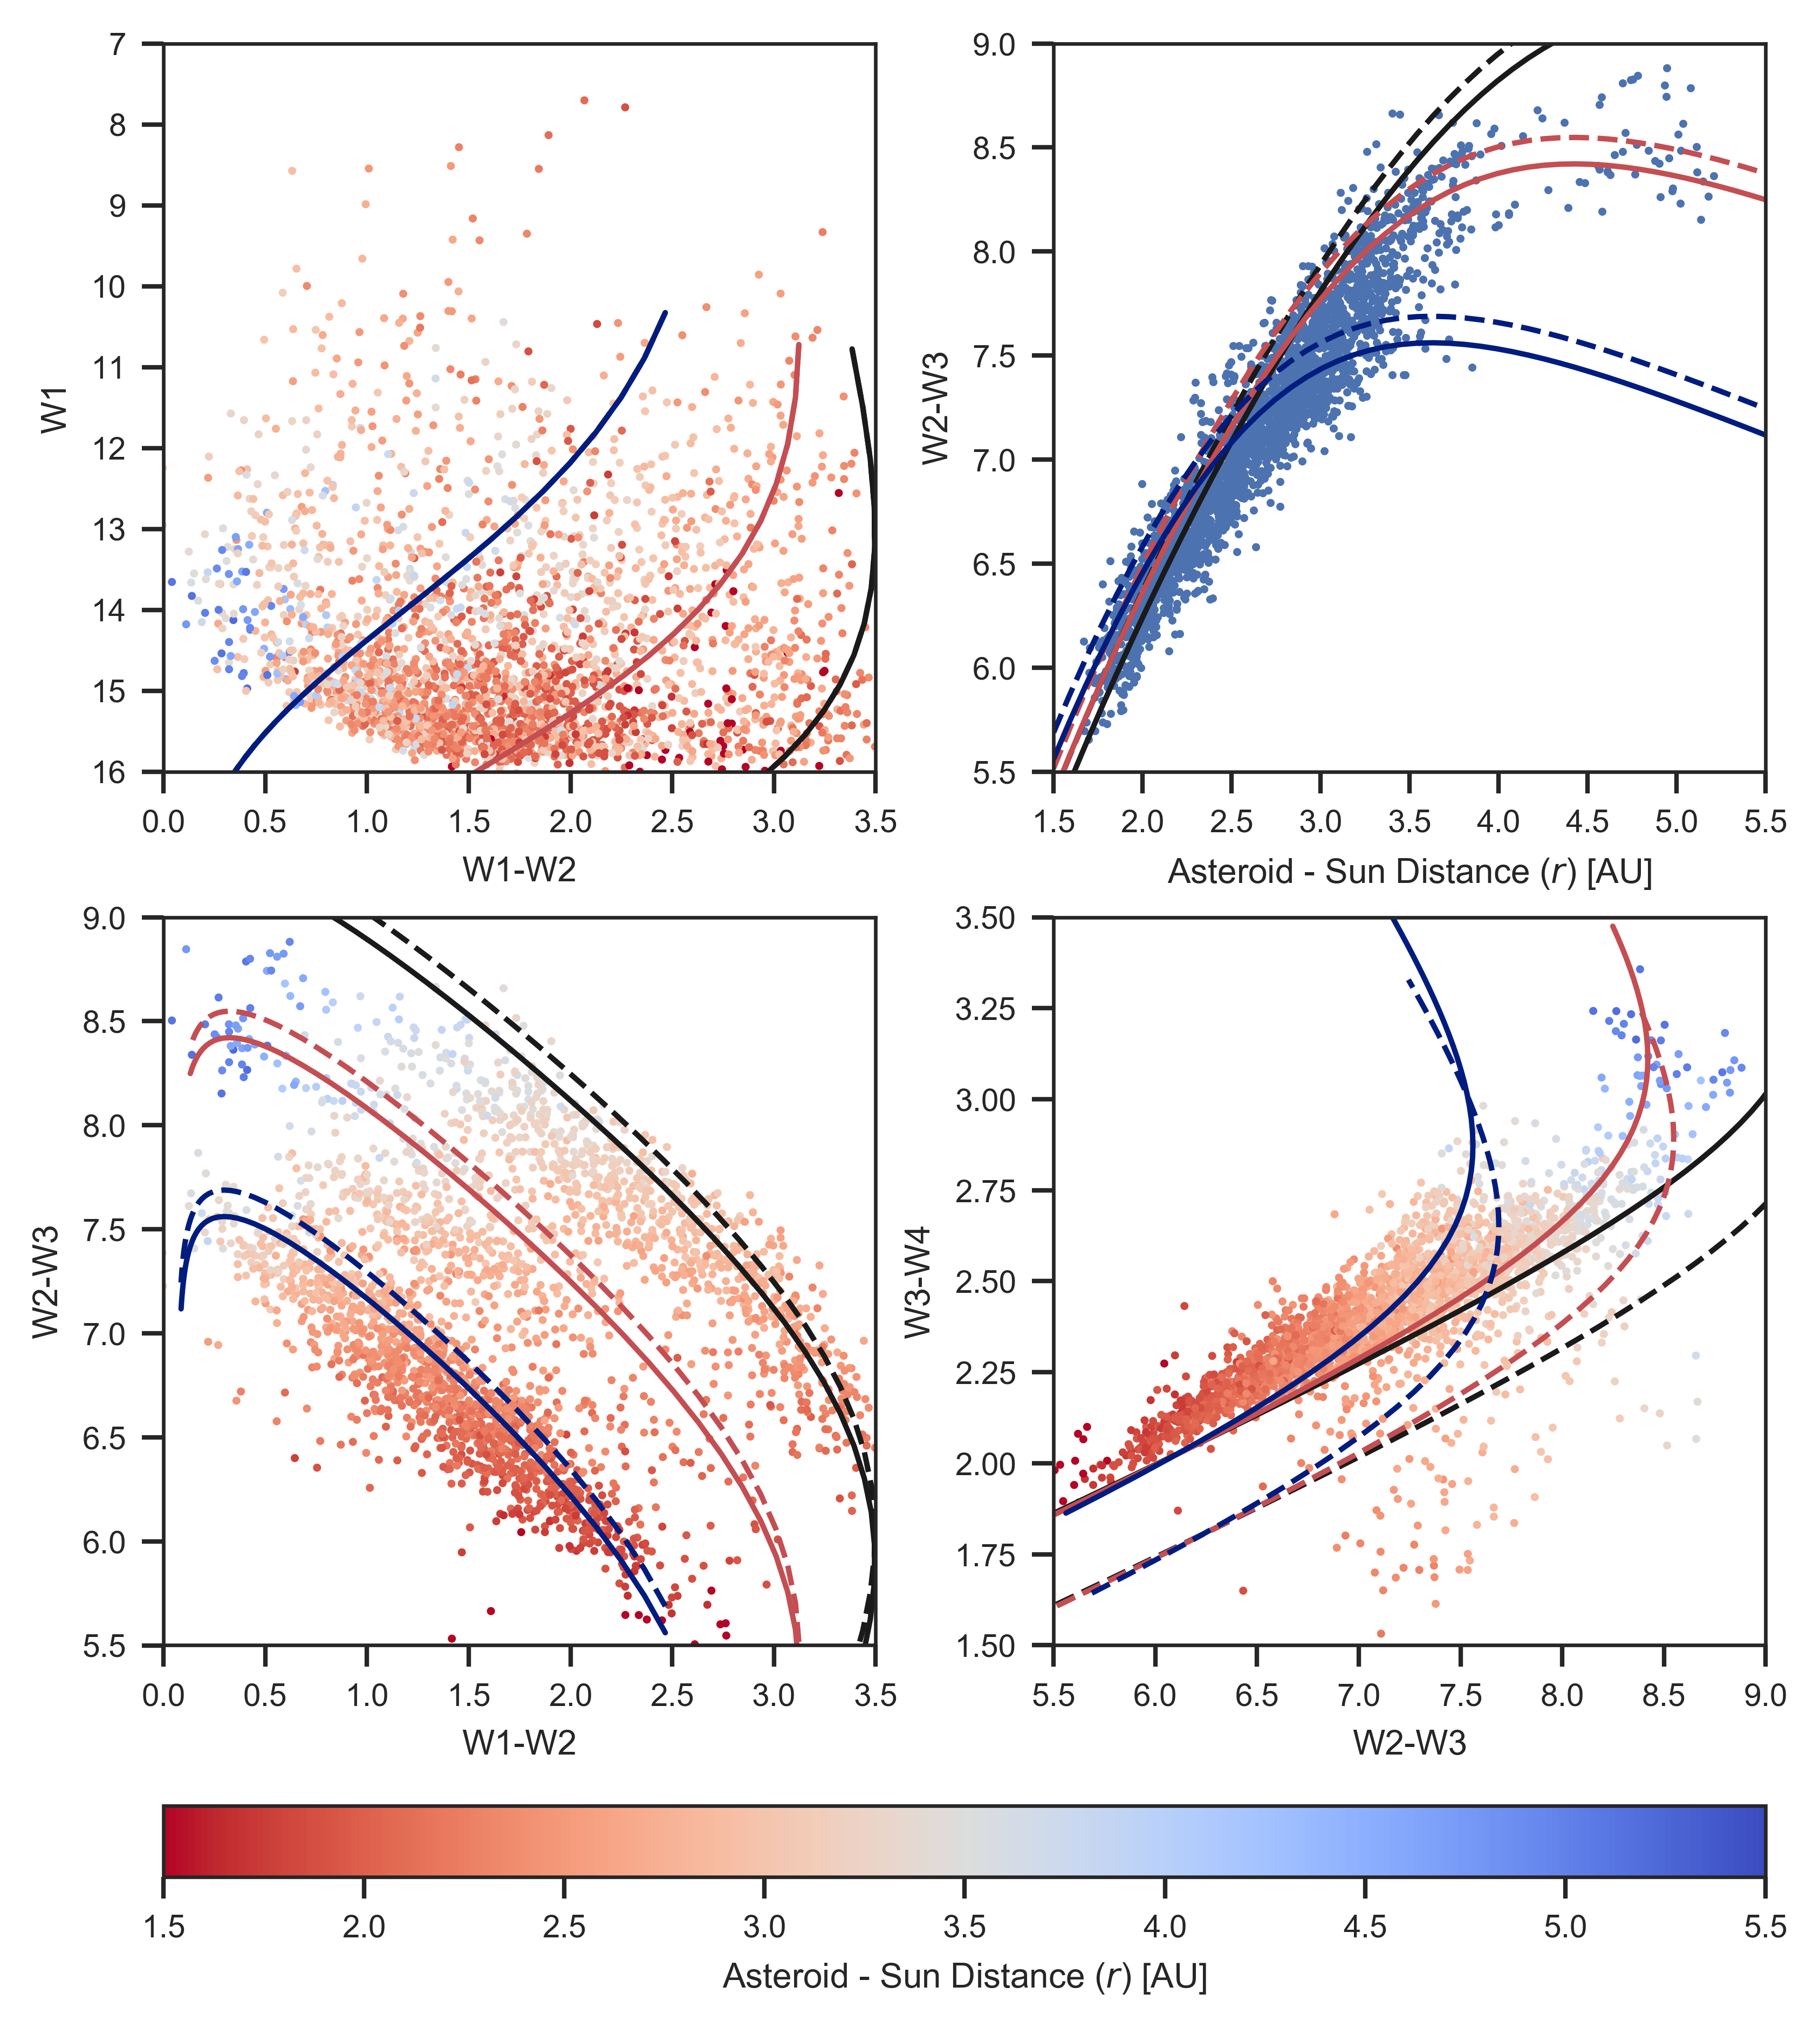

In [9]:
filtered_results = merged_results[(merged_results["num_obs"] >= 28)
                                  & (merged_results["reduced_chi2"] < 3)]
print("Filtered results: {}".format(len(filtered_results)))

scatterKwargs = {
    "cmap" : "coolwarm_r",
    "vmin" : 1.5,
    "vmax" : 5.5,
    "s": 1,
    "c": filtered_results["r_au_median"].values
}

fig, ax = plt.subplots(2, 2, dpi=DPI, figsize=(5.5, 5.5))
fig.subplots_adjust(
        # the left side of the subplots of the figure
        left=0.05,  
        # the right side of the subplots of the figure
        right=0.95,
        # the bottom of the subplots of the figure
        bottom=0.05,
        # the top of the subplots of the figure
        top=0.95,
        # the amount of width reserved for space between subplots,
        # expressed as a fraction of the average axis width
        wspace=0.25,   
        # the amount of height reserved for space between subplots,
        # expressed as a fraction of the average axis height
        hspace=0.2)   
cm = ax[0,0].scatter(filtered_results["W1-W2_median"].values, 
                     filtered_results["mag_W1_median"].values,
                     **scatterKwargs)
_plotTracks(ax[0,0], "W1-W2", "mag_W1")
ax[0,0].set_xlabel("W1-W2")
ax[0,0].set_ylabel("W1")
ax[0,0].set_xlim(0, 3.5)
ax[0,0].set_ylim(7, 16)
ax[0,0].invert_yaxis()

cm = ax[0,1].scatter(filtered_results["r_au_median"].values, 
                     filtered_results["W2-W3_median"].values, 
                     s=1, 
                     c="b")
_plotTracks(ax[0,1], "r_au", "W2-W3")
ax[0,1].set_xlabel(r"Asteroid - Sun Distance ($r$) [AU]")
ax[0,1].set_ylabel("W2-W3")
ax[0,1].set_xlim(1.5, 5.5)
ax[0,1].set_ylim(5.5, 9.0)
ax[0,1].set_xticks(np.arange(1.5, 6.0, 0.5))

cm = ax[1,0].scatter(filtered_results["W1-W2_median"].values, 
                     filtered_results["W2-W3_median"].values, 
                     **scatterKwargs)
_plotTracks(ax[1,0], "W1-W2", "W2-W3")
ax[1,0].set_xlabel("W1-W2")
ax[1,0].set_ylabel("W2-W3")
ax[1,0].set_xlim(0, 3.5)
ax[1,0].set_ylim(5.5, 9.0)

cm = ax[1,1].scatter(filtered_results["W2-W3_median"].values, 
                     filtered_results["W3-W4_median"].values, 
                     **scatterKwargs)
_plotTracks(ax[1,1], "W2-W3", "W3-W4")
ax[1,1].set_xlabel("W2-W3")
ax[1,1].set_ylabel("W3-W4")
ax[1,1].set_xlim(5.5, 9.0)
ax[1,1].set_ylim(1.5, 3.5)

cbar_ax = fig.add_axes([0.05, -0.08, 0.90, 0.04])
fig.colorbar(cm, 
             cax=cbar_ax, 
             label=r"Asteroid - Sun Distance ($r$) [AU]", 
             orientation="horizontal")
if SAVE_FIGS is True:
    fig.savefig(os.path.join(SAVE_DIR, "CCD_tracks.{}".format(FORMAT)),
            bbox_inches='tight')